REFERENCE
- Textbook: “Numerical Methods for Engineers, 8th edition” Steven C. Chapra and Raymond P. Canale, ISBN:1260232077, Copyright year:2021, McGraw-Hill.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows", None)

### Problem 27.2

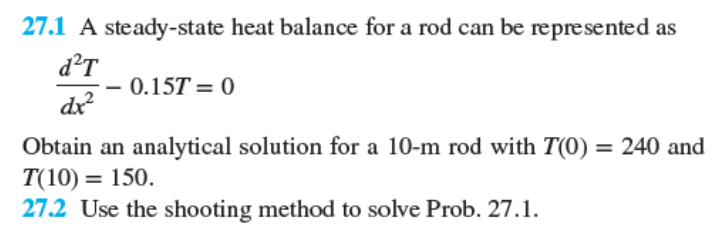

### Answer

1. Define Functions

In [2]:
# reference: pseudocode to implement simple Heun in the figure 25.13
def second_order_henn(x, y, z, h, dydx, dzdx, step_num):
    """
    This function implements the Heun method to solve second-order ODE problem
    
    x: initial value of x
    y: initial value of y
    z: initial value of z
    h: step size
    dydx: first derivative of y(x)
    dzdx: first derivative of x(x)
    step_num: the step number
    
    Returns: corresponding y valur for xt
    """
    
    print('step number, x, y, z, k1_dydx, k1_dzdx, k2_dydx, k2_dzdx, slope_dydx, slope_dzdx')
    
    i = 0
    while i <= step_num:
        # calculate k1 for both ODEs
        k1_dydx = dydx(x, y, z)
        k1_dzdx = dzdx(x, y, z)
        # calculate k2 for both ODEs
        k2_dydx = dydx(x+h, y+k1_dydx*h, z+k1_dzdx*h)
        k2_dzdx = dzdx(x+h, y+k1_dydx*h, z+k1_dzdx*h)
        # calculate the slope (based on Henn method) for both ODEs
        slope_dydx = 1/2 * (k1_dydx + k2_dydx)
        slope_dzdx = 1/2 * (k1_dzdx + k2_dzdx)

        print('{}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f},'.format(
            i, x, y, z, k1_dydx, k1_dzdx, k2_dydx, k2_dzdx, slope_dydx, slope_dzdx))
        
        y_current = y

        i += 1
        x += h
        y += slope_dydx * h
        z += slope_dzdx * h
        
    return y_current

2. Problem Solving

In [3]:
# 1. set up parameters for the problem
# (transform to two first-order ODEs)
# dy/dx = z   
# dz/dx = 0.15*y
# y(0) = 240, y(10) = 150

x0, y0= 0, 240
xt, yt = 10, 150
h = 1
step_num = 10

def dydx(x, y, z):
    return z
def dzdx(x, y, z):
    return 0.15 * y

In [4]:
# 2. initial guess of z
z0_first_guess = -80
yt_with_z0_first_guess = second_order_henn(x=x0, y=y0, z=z0_first_guess, h=h, dydx=dydx, dzdx=dzdx, step_num=step_num)
print('yt_with_z0_first_guess: {:.4f}'.format(yt_with_z0_first_guess))

step number, x, y, z, k1_dydx, k1_dzdx, k2_dydx, k2_dzdx, slope_dydx, slope_dzdx
0, 0.0000, 240.0000, -80.0000, -80.0000, 36.0000, -44.0000, 24.0000, -62.0000, 30.0000,
1, 1.0000, 178.0000, -50.0000, -50.0000, 26.7000, -23.3000, 19.2000, -36.6500, 22.9500,
2, 2.0000, 141.3500, -27.0500, -27.0500, 21.2025, -5.8475, 17.1450, -16.4488, 19.1737,
3, 3.0000, 124.9012, -7.8763, -7.8763, 18.7352, 10.8589, 17.5537, 1.4913, 18.1445,
4, 4.0000, 126.3926, 10.2682, 10.2682, 18.9589, 29.2271, 20.4991, 19.7477, 19.7290,
5, 5.0000, 146.1403, 29.9972, 29.9972, 21.9210, 51.9183, 26.4206, 40.9577, 24.1708,
6, 6.0000, 187.0980, 54.1681, 54.1681, 28.0647, 82.2328, 36.1899, 68.2004, 32.1273,
7, 7.0000, 255.2984, 86.2954, 86.2954, 38.2948, 124.5901, 51.2391, 105.4427, 44.7669,
8, 8.0000, 360.7411, 131.0623, 131.0623, 54.1112, 185.1734, 73.7705, 158.1179, 63.9408,
9, 9.0000, 518.8590, 195.0031, 195.0031, 77.8289, 272.8320, 107.0793, 233.9175, 92.4541,
10, 10.0000, 752.7765, 287.4572, 287.4572, 112.9165, 400.3

In [5]:
# 3. second guess of z
z0_second_guess = -100
yt_with_z0_second_guess = second_order_henn(x=x0, y=y0, z=z0_second_guess, h=h, dydx=dydx, dzdx=dzdx, step_num=step_num)
print('yt_with_z0_second_guess: {:.4f}'.format(yt_with_z0_second_guess))

step number, x, y, z, k1_dydx, k1_dzdx, k2_dydx, k2_dzdx, slope_dydx, slope_dzdx
0, 0.0000, 240.0000, -100.0000, -100.0000, 36.0000, -64.0000, 21.0000, -82.0000, 28.5000,
1, 1.0000, 158.0000, -71.5000, -71.5000, 23.7000, -47.8000, 12.9750, -59.6500, 18.3375,
2, 2.0000, 98.3500, -53.1625, -53.1625, 14.7525, -38.4100, 6.7781, -45.7863, 10.7653,
3, 3.0000, 52.5637, -42.3972, -42.3972, 7.8846, -34.5126, 1.5250, -38.4549, 4.7048,
4, 4.0000, 14.1088, -37.6924, -37.6924, 2.1163, -35.5761, -3.5375, -36.6343, -0.7106,
5, 5.0000, -22.5254, -38.4030, -38.4030, -3.3788, -41.7818, -9.1393, -40.0924, -6.2590,
6, 6.0000, -62.6178, -44.6621, -44.6621, -9.3927, -54.0547, -16.0920, -49.3584, -12.7423,
7, 7.0000, -111.9762, -57.4044, -57.4044, -16.7964, -74.2008, -25.4071, -65.8026, -21.1018,
8, 8.0000, -177.7788, -78.5061, -78.5061, -26.6668, -105.1730, -38.4427, -91.8396, -32.5548,
9, 9.0000, -269.6184, -111.0609, -111.0609, -40.4428, -151.5037, -57.1019, -131.2823, -48.7723,
10, 10.0000, -400.9007, -1

In [6]:
# 4. derive the correct initial value of z
z0 = z0_first_guess + (z0_second_guess-z0_first_guess) / (
    yt_with_z0_second_guess-yt_with_z0_first_guess) * (yt-yt_with_z0_first_guess)
print('The correct guess of z0: {:.4f}'.format(z0))

The correct guess of z0: -90.4497


In [7]:
# 5. solve the ODE using the correct initial value of z
second_order_henn(x=x0, y=y0, z=z0, h=h, dydx=dydx, dzdx=dzdx, step_num=step_num)

step number, x, y, z, k1_dydx, k1_dzdx, k2_dydx, k2_dzdx, slope_dydx, slope_dzdx
0, 0.0000, 240.0000, -90.4497, -90.4497, 36.0000, -54.4497, 22.4326, -72.4497, 29.2163,
1, 1.0000, 167.5503, -61.2334, -61.2334, 25.1326, -36.1008, 15.9475, -48.6671, 20.5400,
2, 2.0000, 118.8832, -40.6933, -40.6933, 17.8325, -22.8608, 11.7285, -31.7771, 14.7805,
3, 3.0000, 87.1061, -25.9128, -25.9128, 13.0659, -12.8469, 9.1790, -19.3799, 11.1225,
4, 4.0000, 67.7263, -14.7904, -14.7904, 10.1589, -4.6314, 7.9404, -9.7109, 9.0497,
5, 5.0000, 58.0153, -5.7407, -5.7407, 8.7023, 2.9616, 7.8412, -1.3896, 8.2717,
6, 6.0000, 56.6258, 2.5310, 2.5310, 8.4939, 11.0249, 8.8735, 6.7780, 8.6837,
7, 7.0000, 63.4037, 11.2147, 11.2147, 9.5106, 20.7253, 11.1928, 15.9700, 10.3517,
8, 8.0000, 79.3737, 21.5664, 21.5664, 11.9061, 33.4724, 15.1410, 27.5194, 13.5235,
9, 9.0000, 106.8931, 35.0899, 35.0899, 16.0340, 51.1239, 21.2975, 43.1069, 18.6657,
10, 10.0000, 150.0000, 53.7556, 53.7556, 22.5000, 76.2556, 30.5633, 65.0056, 26.5

149.9999999999996

### Problem 27.4


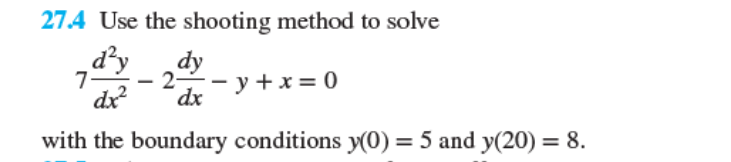

### Answer

1. Define Functions

2. Problem Solving

In [8]:
# 1. set up parameters for the problem
# (transform to two first-order ODEs)
# dy/dx = z   
# dz/dx = (2 * z + y - x) / 7
# y(0) = 5, y(20) = 8

x0, y0= 0, 5
xt, yt = 20, 8
h = 1
step_num = 20

def dydx(x, y, z):
    return z
def dzdx(x, y, z):
    return (2 * z + y - x) / 7

In [9]:
# 2. initial guess of z
z0_first_guess = -1
yt_with_z0_first_guess = second_order_henn(x=x0, y=y0, z=z0_first_guess, h=h, dydx=dydx, dzdx=dzdx, step_num=step_num)
print('yt_with_z0_first_guess: {:.4f}'.format(yt_with_z0_first_guess))

step number, x, y, z, k1_dydx, k1_dzdx, k2_dydx, k2_dzdx, slope_dydx, slope_dzdx
0, 0.0000, 5.0000, -1.0000, -1.0000, 0.4286, -0.5714, 0.2653, -0.7857, 0.3469,
1, 1.0000, 4.2143, -0.6531, -0.6531, 0.2726, -0.3805, 0.1143, -0.5168, 0.1935,
2, 2.0000, 3.6975, -0.4596, -0.4596, 0.1112, -0.3484, -0.0656, -0.4040, 0.0228,
3, 3.0000, 3.2935, -0.4368, -0.4368, -0.0829, -0.5196, -0.3118, -0.4782, -0.1973,
4, 4.0000, 2.8153, -0.6341, -0.6341, -0.3504, -0.9845, -0.6840, -0.8093, -0.5172,
5, 5.0000, 2.0060, -1.1513, -1.1513, -0.7567, -1.9080, -1.2802, -1.5296, -1.0184,
6, 6.0000, 0.4763, -2.1697, -2.1697, -1.4090, -3.5788, -2.2644, -2.8743, -1.8367,
7, 7.0000, -2.3979, -4.0065, -4.0065, -2.4873, -6.4937, -3.9131, -5.2501, -3.2002,
8, 8.0000, -7.6480, -7.2067, -7.2067, -4.2945, -11.5011, -6.6938, -9.3539, -5.4942,
9, 9.0000, -17.0019, -12.7008, -12.7008, -7.3434, -20.0442, -11.3987, -16.3725, -9.3710,
10, 10.0000, -33.3744, -22.0719, -22.0719, -12.5026, -34.5744, -19.3707, -28.3231, -15.9367,
11, 

In [10]:
# 3. second guess of z
z0_second_guess = -0.5
yt_with_z0_second_guess = second_order_henn(x=x0, y=y0, z=z0_second_guess, h=h, dydx=dydx, dzdx=dzdx, step_num=step_num)
print('yt_with_z0_second_guess: {:.4f}'.format(yt_with_z0_second_guess))

step number, x, y, z, k1_dydx, k1_dzdx, k2_dydx, k2_dzdx, slope_dydx, slope_dzdx
0, 0.0000, 5.0000, -0.5000, -0.5000, 0.5714, 0.0714, 0.5204, -0.2143, 0.5459,
1, 1.0000, 4.7857, 0.0459, 0.0459, 0.5539, 0.5999, 0.5759, 0.3229, 0.5649,
2, 2.0000, 5.1086, 0.6108, 0.6108, 0.6186, 1.2295, 0.7398, 0.9201, 0.6792,
3, 3.0000, 6.0287, 1.2900, 1.2900, 0.8013, 2.0913, 1.0716, 1.6907, 0.9364,
4, 4.0000, 7.7194, 2.2265, 2.2265, 1.1675, 3.3939, 1.6762, 2.8102, 1.4219,
5, 5.0000, 10.5296, 3.6483, 3.6483, 1.8323, 5.4806, 2.7342, 4.5645, 2.2832,
6, 6.0000, 15.0941, 5.9316, 5.9316, 2.9939, 8.9255, 4.5538, 7.4285, 3.7738,
7, 7.0000, 22.5226, 9.7054, 9.7054, 4.9905, 14.6959, 7.6600, 12.2007, 6.3252,
8, 8.0000, 34.7233, 16.0307, 16.0307, 8.3978, 24.4285, 12.9444, 20.2296, 10.6711,
9, 9.0000, 54.9528, 26.7018, 26.7018, 14.1938, 40.8955, 21.9208, 33.7986, 18.0573,
10, 10.0000, 88.7515, 44.7591, 44.7591, 24.0385, 68.7976, 37.1580, 56.7783, 30.5982,
11, 11.0000, 145.5298, 75.3573, 75.3573, 40.7492, 116.1065, 6

In [11]:
# 4. derive the correct initial value of z
z0 = z0_first_guess + (z0_second_guess-z0_first_guess) / (
    yt_with_z0_second_guess-yt_with_z0_first_guess) * (yt-yt_with_z0_first_guess)
print('The correct guess of z0: {:.4f}'.format(z0))

The correct guess of z0: -0.8286


In [12]:
# 5. solve the ODE using the correct initial value of z
second_order_henn(x=x0, y=y0, z=z0, h=h, dydx=dydx, dzdx=dzdx, step_num=step_num)

step number, x, y, z, k1_dydx, k1_dzdx, k2_dydx, k2_dzdx, slope_dydx, slope_dzdx
0, 0.0000, 5.0000, -0.8286, -0.8286, 0.4775, -0.3511, 0.3527, -0.5899, 0.4151,
1, 1.0000, 4.4101, -0.4135, -0.4135, 0.3690, -0.0445, 0.2725, -0.2290, 0.3208,
2, 2.0000, 4.1811, -0.0927, -0.0927, 0.2851, 0.1924, 0.2104, 0.0498, 0.2478,
3, 3.0000, 4.2310, 0.1550, 0.1550, 0.2201, 0.3752, 0.1623, 0.2651, 0.1912,
4, 4.0000, 4.4961, 0.3463, 0.3463, 0.1698, 0.5161, 0.1249, 0.4312, 0.1474,
5, 5.0000, 4.9273, 0.4937, 0.4937, 0.1307, 0.6243, 0.0957, 0.5590, 0.1132,
6, 6.0000, 5.4863, 0.6068, 0.6068, 0.1000, 0.7068, 0.0724, 0.6568, 0.0862,
7, 7.0000, 6.1431, 0.6930, 0.6930, 0.0756, 0.7686, 0.0533, 0.7308, 0.0645,
8, 8.0000, 6.8739, 0.7575, 0.7575, 0.0555, 0.8130, 0.0368, 0.7852, 0.0462,
9, 9.0000, 7.6591, 0.8036, 0.8036, 0.0380, 0.8417, 0.0209, 0.8226, 0.0295,
10, 10.0000, 8.4818, 0.8331, 0.8331, 0.0211, 0.8542, 0.0033, 0.8436, 0.0122,
11, 11.0000, 9.3254, 0.8453, 0.8453, 0.0023, 0.8476, -0.0192, 0.8464, -0.0084,
12,

8.000000000003157